100%|██████████| 9.91M/9.91M [00:00<00:00, 54.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.71MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.98MB/s]


Epoch 1: D_loss=1.093, G_loss=0.929
Epoch 2: D_loss=1.330, G_loss=1.010
Epoch 3: D_loss=0.567, G_loss=1.580
Epoch 4: D_loss=0.876, G_loss=1.430
Epoch 5: D_loss=1.444, G_loss=0.839


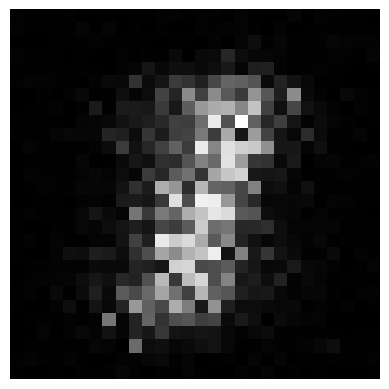

In [1]:
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data loader setup
data = DataLoader(datasets.MNIST('.', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])), batch_size=64, shuffle=True)

# Generator Model
G = nn.Sequential(
    nn.Linear(100, 256),
    nn.ReLU(),
    nn.Linear(256, 784),
    nn.Tanh()
)

# Discriminator Model
D = nn.Sequential(
    nn.Linear(784, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 1),
    nn.Sigmoid()
)

# Optimizers and loss function
opt_G = optim.Adam(G.parameters(), lr=2e-4)
opt_D = optim.Adam(D.parameters(), lr=2e-4)
loss = nn.BCELoss()

# Training loop
for epoch in range(5):
    for real, _ in data:
        real = real.view(-1, 784)
        z = torch.randn(real.size(0), 100)
        fake = G(z)

        # Discriminator training
        loss_D = loss(D(real), torch.ones(real.size(0), 1)) + \
                 loss(D(fake.detach()), torch.zeros(real.size(0), 1))
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # Generator training
        loss_G = loss(D(fake), torch.ones(real.size(0), 1))
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch+1}: D_loss={loss_D.item():.3f}, G_loss={loss_G.item():.3f}")

# Generate and show sample image
img = G(torch.randn(1, 100)).view(28, 28).detach()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
